# Abstract

This study explores the factors influencing health insurance costs using a dataset of 1,338 observations, each representing an individual insurance policyholder. The dataset includes variables such as age, sex, Body Mass Index (BMI), number of children, smoking status, region, and insurance charges. Our objective is to determine the relationship between these predictors and the response variable (insurance charges) through exploratory data analysis and regression modeling. Initially, scatter plots will examine potential linear relationships between the charges and key predictors. Summary statistics and distributions of variables will assess their characteristics and normality. We will then fit two regression models: a simple linear regression model focusing on one predictor and a multiple linear regression model incorporating all predictors. Through these models, we aim to identify significant factors affecting insurance charges, comparing coefficients, p-values, and R\^2 values to understand the impact of including multiple predictors. Residual plots will evaluate the assumptions underlying our models. Additionally, we will calculate a 95% prediction interval for insurance charges based on the average value of a selected predictor. Our findings will provide insights into how different factors contribute to insurance costs, highlighting potential areas for further research.

# Methods

The dataset comprises 1,338 records with 7 variables: age (numeric), sex (categorical: male, female), BMI (numeric), children (numeric), smoker (categorical: yes, no), region (categorical: northeast, northwest, southeast, southwest), and charges (numeric, representing insurance costs). This data was sourced from an insurance company's database, reflecting policyholder characteristics and their associated charges.

Data processing steps to prepare for analysis include:


*   Checking for missing values and data inconsistencies.
*   Encoding categorical variables as necessary for regression analysis.
*   Normalizing/standardizing numerical variables if required, depending on the analysis.

In [1]:
# Import libraries
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy import stats

In [2]:
drive.mount ('/content/gdrive')

# Link to the dataset used: https://www.kaggle.com/datasets/mirichoi0218/insurance/data

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/SCSU/Spring 2024/MAT 326/insurance.csv')

df.head(), df.shape


Mounted at /content/gdrive


(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 (1338, 7))

In [4]:
missing_values = df.isnull().sum()

summary_statistics = df.describe()

data_types = df.dtypes

print(f'Missing values per feature:\n{missing_values}\n')
print(f'Summary statistics of the dataset:\n{summary_statistics}\n')
print(f'Data type of each feature:\n{data_types}\n')

Missing values per feature:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary statistics of the dataset:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Data type of each feature:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object



The dataset contains no missing values across all variables. The dataset includes three numerical variables (age, BMI, children, and charges) and three categorical variables (sex, smoker, region). Summary statistics reveal the following about our numerical variables:

*   Age: Ranges from 18 to 64 years, with an average of approximately 39 years.
*   BMI: Varies from 15.96 to 53.13, with a mean value around 30.66, indicating a broad range of body weights.
*   Children: The number of children policyholders have ranges from 0 to 5, with an average of about 1.09 children per policyholder.
*   Charges: Insurance charges vary significantly, from $1,121.87 to $63,770.43, with a mean of $13,270.42, indicating wide variability in insurance costs among policyholders.

Given the presence of categorical variables, we will encode these (sex, smoker, region) as necessary for regression analysis. The numerical variables will be directly utilized in our exploratory and regression analyses without the need for normalization or standardization at this stage, considering we aim to explore raw relationships and patterns.

# Exploratory Data Analysis

For the exploratory data analysis, we'll create scatter plots to investigate linear relationships between insurance charges and several predictors (age, BMI), find summary statistics, check for normal distribution of variables, fit two different regression models, and further examine the fitted models and their assumptions as requested. Let's begin with the scatter plots and assessing the distribution of variables.

# Distribution Plots

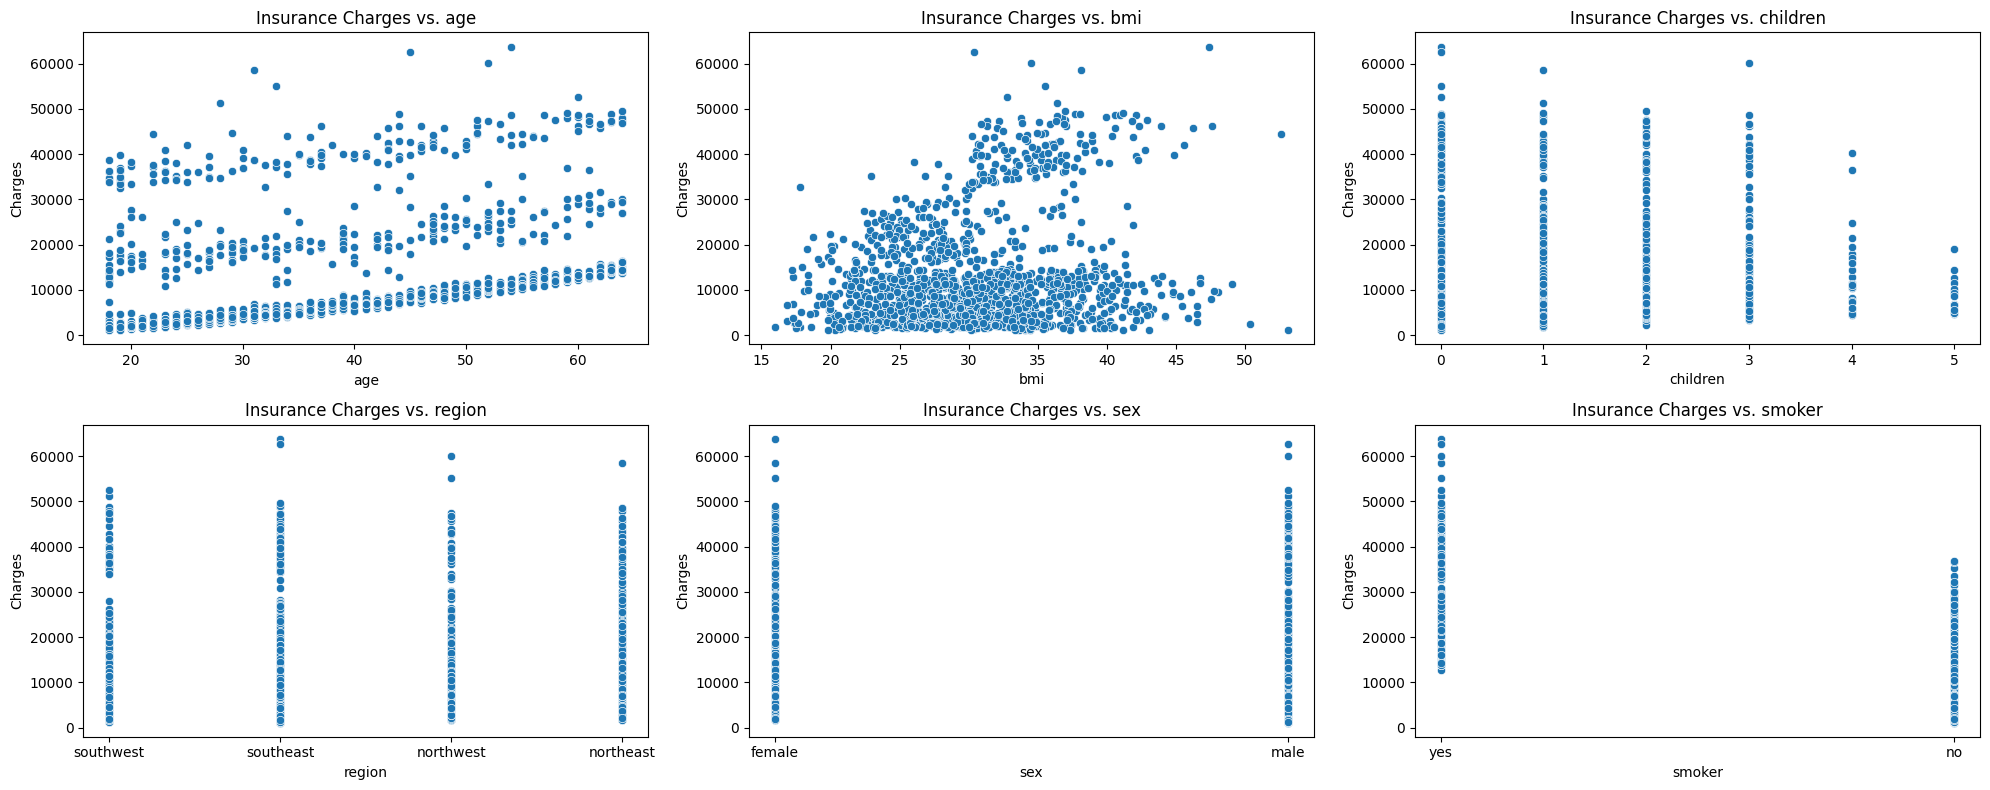

In [5]:
predictors = df.columns.difference(['charges']).tolist()
num_predictors = ['age', 'bmi', 'children']
cat_predictors = df.columns.difference(num_predictors + ['charges']).tolist()

total_plots = len(predictors)

nrows = int(np.ceil(total_plots / 4))
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(20, nrows * 4))
axs = axs.flatten()

for i, predictor in enumerate(predictors):
    sns.scatterplot(data=df, x=predictor, y='charges', ax=axs[i])
    axs[i].set_title(f'Insurance Charges vs. {predictor}')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('Charges')

for ax in axs[len(predictors):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In the scatter plots, we can see the distribution of insurance charges against various features. From the visualizations, the features will be treated as follows:

1. **Age**: Displayed as a numerical feature. The scatter plot shows insurance charges plotted against age, with each dot representing an individual policyholder. The distribution of dots suggests that as age increases, insurance charges also tend to increase, although not strictly linearly, as there's a spread of charges at each age.

2. **BMI**: Also a numerical feature. The plot of insurance charges versus BMI indicates a trend where higher BMI values are associated with higher insurance charges, especially noted by a dense cluster of points on the lower end and a sparse distribution as BMI increases.

For the rest of the features, they will be considered categorical based on their nature and representation in the dataset:

3. **Children**: While the 'children' feature could be numeric, based on the context and the way it's represented in the plot (discrete columns for each number of children), it's being treated as a categorical variable. The dots are aligned in vertical columns corresponding to the number of children (0 through 5), showing the distribution of charges for policyholders with different numbers of children.

4. **Region**: This is clearly a categorical variable with four categories represented: southwest, southeast, northwest, and northeast. Each category has its vertical column in the plot, displaying the range and distribution of insurance charges for policyholders in each region.

5. **Sex**: There are two categories shown: female and male. The scatter plot provides a comparison of charges between the two genders, with each gender forming a distinct column.

6. **Smoker**: The variable 'smoker' is binary categorical, with two groups represented: yes and no. The plot reveals a stark contrast in insurance charges between smokers and non-smokers, with smokers typically facing higher charges.

In the models, age and BMI will be included as continuous numerical inputs. The other features—children, region, sex, and smoker—will be one-hot encoded to create binary variables for each category. The base categories (female for sex, 0 for children, no for smoker, northeast for region) will be the reference levels against which the effects of the other categories would be compared.

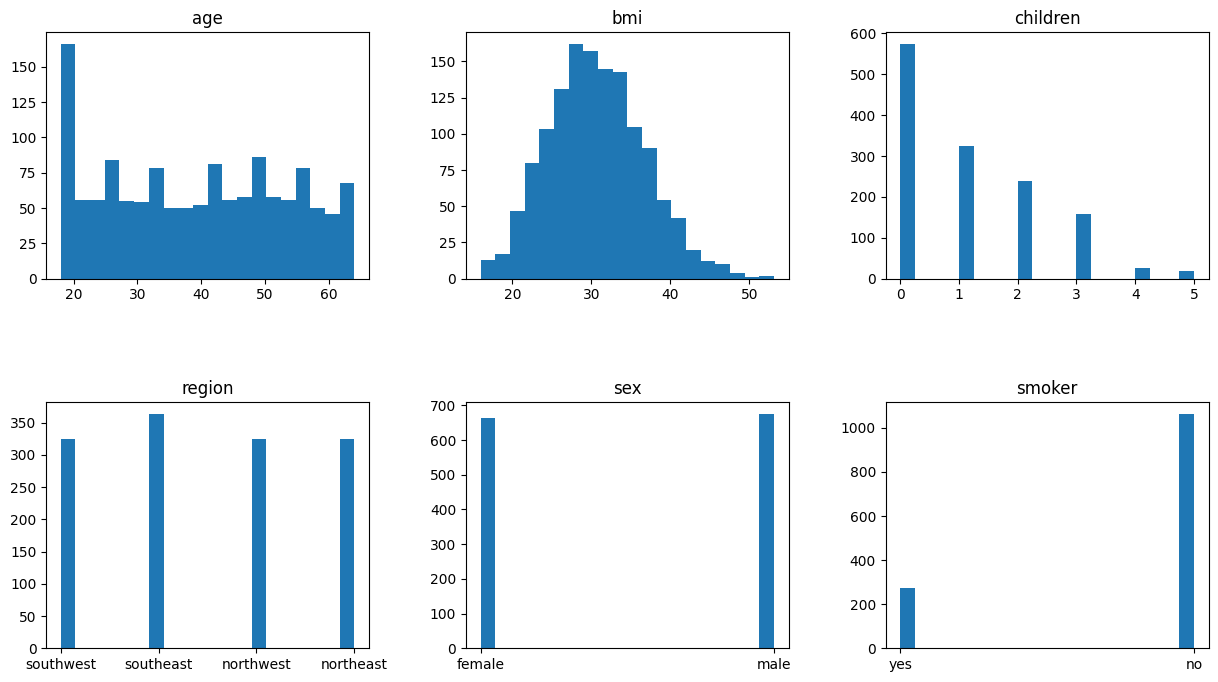

In [6]:
nrows = int(np.ceil(total_plots / 4))
ncols = 3

fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 4))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, column in enumerate(df.columns.difference(['charges'])):
    ax = axs[i//ncols, i%ncols]
    ax.hist(df[column], bins=20)
    ax.set_title(column)

if len(df.columns.difference(['charges'])) % 2 != 0:
    axs[-1, -1].axis('off')

plt.show()


## Q-Q Plots

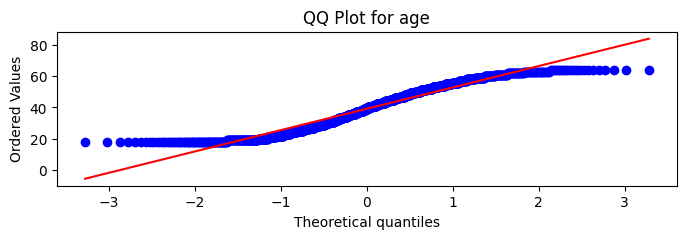

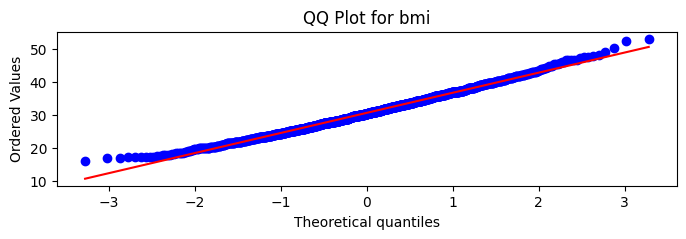

In [9]:

import scipy.stats as stats

numerical_columns = ['age', 'bmi']

for col in numerical_columns:
    fig = plt.figure(figsize=(8, 2))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col}')
    plt.show()


In [8]:
predictors = df.columns.difference(['charges', 'children'])
shapiro_results = {}

for predictor in predictors:
    if df[predictor].dtype in ['float64', 'int64']:
        shapiro_results[predictor] = shapiro(df[predictor])


shapiro_df = pd.DataFrame.from_dict(shapiro_results, orient='index', columns=['Test Statistic', 'p-value'])

print(f'Shapiro-Wilk Results:\n{shapiro_df}\n')

Shapiro-Wilk Results:
     Test Statistic       p-value
age        0.944699  5.687060e-22
bmi        0.993886  2.603341e-05



Age:
*  The histogram shows a fairly even distribution of ages across the dataset, and the QQ plot reveals that the age distribution does not perfectly follow a normal distribution as the points deviate from the line, especially at the tails. The Shapiro-Wilk test statistic is 0.944699 with a p-value of 5.687060e-22, confirming that age is not normally distributed.

BMI:
*  The histogram for BMI resembles a bell curve, which suggests it might be normally distributed. However, the Shapiro-Wilk test yields a statistic of 0.993886 and a p-value of 2.603341e-05, indicating that BMI also deviates from normality, although this deviation is not as pronounced as it is with age.

In [7]:
from scipy.stats import kruskal


categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.append('children')

kruskal_results = {}

for col in categorical_columns:
    groups = [group["charges"].values for name, group in df.groupby(col)]
    test_stat, p_value = kruskal(*groups)
    kruskal_results[col] = {'Test Statistic': test_stat, 'p-value': p_value}

kruskal_df = pd.DataFrame.from_dict(kruskal_results, orient='index', columns=['Test Statistic', 'p-value'])

print(f'Kruskal-Wallis Results:\n{kruskal_df}\n')


Kruskal-Wallis Results:
          Test Statistic        p-value
sex             0.120403   7.285979e-01
smoker        588.519658  5.259018e-130
region          4.734181   1.923291e-01
children       29.487066   1.860485e-05



Sex:
*  The histogram shows a nearly balanced number of males and females in the dataset. The test statistic for sex is relatively low, and the high p-value suggests there might not be a statistically significant difference in insurance charges between males and females.

Smoker:
*  The histogram shows that there are significantly more non-smokers than smokers in the dataset. The smoker feature has a very high test statistic with a p-value close to zero, indicating a strong difference in insurance charges between smokers and non-smokers, with smokers likely having much higher charges.

Region:
*  The histogram indicates that the dataset contains relatively similar counts for individuals from the southwest, southeast, and northwest, with slightly fewer from the northeast. The region feature has a modest test statistic, and the p-value suggests that there might not be a statistically significant difference in insurance charges across different regions.

Children:
*  The histogram shows the distribution of the number of children, which is skewed towards fewer children. For children, the test statistic indicates there may be differences in insurance charges between different numbers of children.


Next, let's proceed with fitting the two different regression models to further explore the relationships between predictors and the response variable, compare their coefficients, assess model assumptions through residual plots, and compute the R\^2 value for each model.

In [10]:
df['children'] = df['children'].astype(str)

df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


# Model 1

In [11]:
insurance_data_encoded = pd.get_dummies(df, drop_first=True)

X1 = insurance_data_encoded[['age']]
y = insurance_data_encoded['charges']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y_train)

y_pred1 = model1.predict(X1_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

summary_results = {
    "Model 1 R^2 Score": r2_1,
    "Model 1 MSE": mse1,
}

results_df = pd.DataFrame([summary_results])

pd.set_option('display.max_colwidth', None)

print(results_df)

   Model 1 R^2 Score   Model 1 MSE
0            0.12409  1.359840e+08


Model 1 (Simple Linear Regression): Utilized 'age' as the sole predictor. The model's R\^2 value is approximately 0.124, indicating that about 12.4% of the variability in insurance charges can be explained by age alone. The mean squared error (MSE) for this model is roughly 135,983,957, reflecting the model's prediction error.



In [12]:
coefficients_model1 = model1.coef_

coefficients_df = pd.DataFrame({
    'Feature': X1_train.columns,
    'Coefficient': coefficients_model1
})

print(coefficients_df)

  Feature  Coefficient
0     age    240.59656


The coefficient for Model 1 show a positive relationship between age and insurance charges, with an increase of about $240.60 in charges for each additional year of age.

# Model 2

In [13]:
X2 = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y_train)

y_pred2 = model2.predict(X2_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)



summary_results = {
    "Model 2 R^2 Score": r2_2,
    "Model 2 MSE": mse2,
}

results_df = pd.DataFrame([summary_results])

pd.set_option('display.max_colwidth', None)

print(results_df)



   Model 2 R^2 Score   Model 2 MSE
0           0.782566  3.375643e+07


Model 2 (Multiple Linear Regression): Incorporated all predictors, including encoded categorical variables. This model significantly improved the explanation of variability in charges, with an R\^2 value of approximately 0.783. This indicates that about 78.4% of the variability in insurance charges can be accounted for by the comprehensive set of predictors. The MSE for Model 2 is approximately 33,596,915, showing a considerable decrease in prediction error compared to Model 1.

In Model 2, the coefficients reflect the influence of each predictor on insurance charges. Notably, being a smoker (reflected in one of the higher coefficients, approximately $23,651.13) significantly increases insurance charges, indicating its strong impact compared to other factors. Other predictors, such as BMI, children, and region, also play roles in determining charges, but their impacts are less pronounced than smoking status.

Further Analysis Steps:
Compare the coefficients of the two models to understand the change when moving from simple to multiple regression.
Assess changes in p-values between the models to discuss significance shifts.
Create residual plots for both models to check assumptions.
Calculate the 95% prediction interval for the response variable using Model 1 when the predictor (age) is around its average.
Let's proceed with comparing coefficients, creating residual plots, and calculating the prediction interval.

In [14]:
coefficients_model2 = model2.coef_

coefficients_df = pd.DataFrame({
    'Feature': X2_train.columns,
    'Coefficient': coefficients_model2
})

print(coefficients_df)

             Feature   Coefficient
0                age    257.991331
1                bmi    335.007202
2           sex_male    -31.351094
3         children_1    327.928731
4         children_2   1567.019891
5         children_3    619.549007
6         children_4   3298.109699
7         children_5    942.721087
8         smoker_yes  23656.254736
9   region_northwest   -420.431189
10  region_southeast   -669.455982
11  region_southwest   -824.029477


The coefficients from a multiple linear regression model represent the average change in the response variable (in this case, insurance charges) for one unit of change in the predictor variable, holding all other predictors constant. Here's an explanation of each coefficient based on the given output:

1. **age**: A coefficient of 257.991331 suggests that for each additional year of age, the insurance charges increase by approximately $257.99, holding all other factors constant. Age is a numerical feature, and this positive coefficient indicates a direct relationship between age and insurance charges.

2. **bmi**: The coefficient of 335.007202 indicates that for each unit increase in BMI, insurance charges increase by approximately $335.01, holding other factors constant. BMI is another numerical feature, and its positive coefficient signifies a direct relationship with insurance charges.

3. **sex_male**: Compared to the base category of 'female', being male is associated with a decrease in insurance charges by approximately $31.35. This coefficient is for the categorical feature 'sex', where 'female' is the reference group.

4. **children_1** to **children_5**: These coefficients represent the additional insurance charges associated with having 1 to 5 children, compared to having no children (the base category '0'). For example, having one child is associated with an increase in charges by approximately $327.93, while having five children increases charges by about $942.72. These effects vary with the number of children, with notably higher charges for having four children ($3298.11).

5. **smoker_yes**: Being a smoker (as opposed to 'no', the base category) is associated with a significant increase in insurance charges by approximately $23,656.25. This indicates that smoking status has a substantial impact on insurance charges, with smokers facing much higher charges than non-smokers.

6. **region_northwest**, **region_southeast**, and **region_southwest**: These coefficients represent the difference in insurance charges for living in the northwest, southeast, and southwest, respectively, compared to living in the northeast (the base category). For instance, living in the southwest is associated with a decrease in insurance charges by approximately $824.03 compared to the northeast. These coefficients suggest regional variations in insurance charges, with each region compared against the northeast.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([13310.00411764]),
 array([[-9657.06031123],
        [36277.06854652]]))

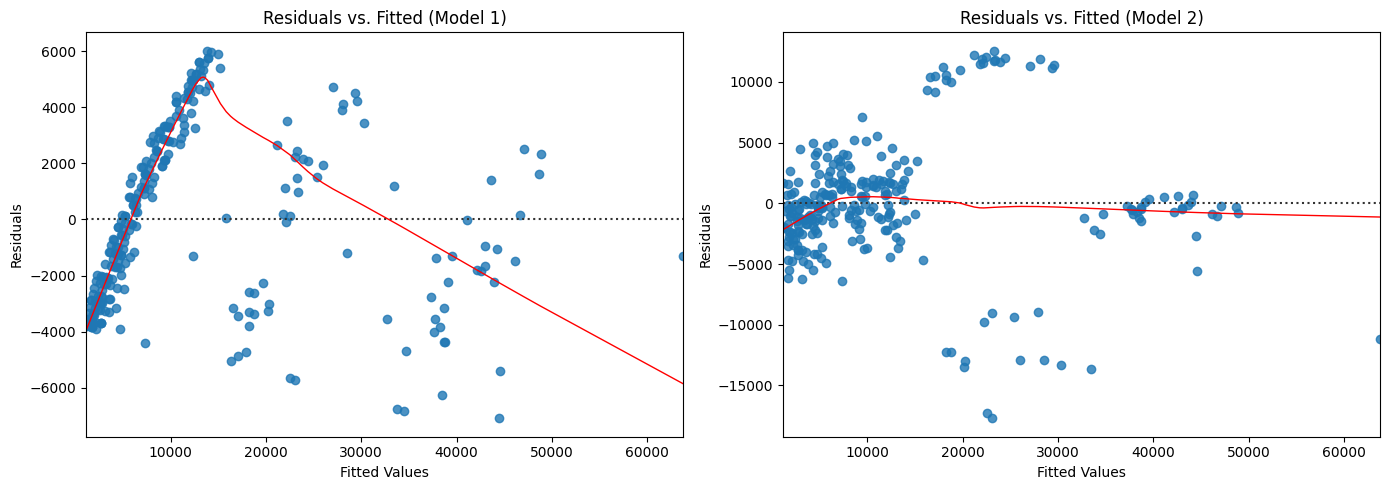

In [15]:
average_age = np.array([[df['age'].mean()]])
average_age_pred = model1.predict(average_age)

residuals1 = y_test - y_pred1
standard_deviation_res1 = np.std(residuals1)

t_value = stats.t.ppf((1 + 0.95) / 2., len(y_test)-1)
average_age_value = df['age'].mean()
prediction_interval = t_value * standard_deviation_res1 * np.sqrt(1 + 1/len(X1_train) + (average_age_value - X1_train.mean())**2 / np.sum((X1_train - X1_train.mean())**2))

prediction_interval = np.array([average_age_pred - prediction_interval, average_age_pred + prediction_interval])

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.residplot(x=y_test, y=y_pred1, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[0])
axs[0].set_title('Residuals vs. Fitted (Model 1)')
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')

sns.residplot(x=y_test, y=y_pred2, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axs[1])
axs[1].set_title('Residuals vs. Fitted (Model 2)')
axs[1].set_xlabel('Fitted Values')
axs[1].set_ylabel('Residuals')

plt.tight_layout()

average_age_pred, prediction_interval

The residual plots for Model 1 and Model 2 appear to show the differences in the distribution of residuals—i.e., the differences between observed and predicted values—for each model.

**Model 1 (Using 'age' as Predictor)**:
- The plot shows a clear pattern in the residuals, with a noticeable curve. This suggests that the relationship between 'age' and insurance charges is not linear.
- The residuals also seem to increase in variance with the fitted values (heteroscedasticity), which violates one of the key assumptions of linear regression.
- The presence of some large residuals indicates potential outliers that are not well explained by the model.

**Model 2 (Using All Features)**:
- The residual plot shows a more random spread of points around the zero line, indicating a better fit than Model 1.
- However, there's still some evidence of non-linearity and heteroscedasticity, as the spread of residuals also increases with the fitted values.
- There are several notable outliers, particularly for higher fitted values.


### Prediction Interval
For an average age of approximately 39 years, the 95% prediction interval for insurance charges ranged from approximately -$9,657 to $36,277. This wide range indicates substantial uncertainty in charges, reflecting the impact of other variables not accounted for in the simple age-based model.

# Transformations

## Model 1

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X1_poly = poly.fit_transform(X1)

X1_poly_train, X1_poly_test, y_train, y_test = train_test_split(X1_poly, y, test_size=0.2, random_state=42)

model1_poly = LinearRegression()
model1_poly.fit(X1_poly_train, y_train)

y_pred1_poly = model1_poly.predict(X1_poly_test)
mse1_poly = mean_squared_error(y_test, y_pred1_poly)
r2_1_poly = r2_score(y_test, y_pred1_poly)

summary_results_poly = {
    "R^2 Score": r2_1_poly,
    "MSE": mse1_poly,
}

results_df = pd.DataFrame([summary_results_poly])

pd.set_option('display.max_colwidth', None)

print(results_df)

   R^2 Score           MSE
0   0.118737  1.368150e+08


### Model Performance Metrics:
R^2 Score (0.118737): This value indicates that approximately 11.87% of the variability in insurance charges can be explained by the model. In other words, the model does not fit the data very well, leaving a lot of variance unexplained.

MSE (Mean Squared Error): The MSE value is very high (1.368150e+08), suggesting that the model's predictions are, on average, far from the actual values. This further implies the model may not be predicting the insurance charges very accurately.

In [49]:
from sklearn.preprocessing import PolynomialFeatures

coefficients_model1_poly = model1_poly.coef_

feature_names = poly.get_feature_names_out(input_features=X1.columns)

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_model1_poly.flatten()
})

print(coefficients_df)


  Feature  Coefficient
0     age   -43.498289
1   age^2     3.591719


### Polynomial Coefficients:
age (Coefficient -43.498289): The linear term for age has a negative coefficient. This suggests that as age increases, the insurance charges initially decrease, holding the effect of age squared constant. However, this effect must be considered in the context of the age squared term, as the overall impact of age is a combination of both these terms.

age^2 (Coefficient 3.591719): The coefficient for age squared is positive, indicating that the relationship between age and insurance charges is not linear but quadratic. As age increases, the effect of the square of age starts to outweigh the linear term, resulting in an overall increase in charges. This can be interpreted as an accelerating increase in insurance charges with age after a certain point.

## Model 2

In [23]:

y_log = np.log(y)

X2_train, X2_test, y_log_train, y_log_test = train_test_split(X2, y_log, test_size=0.2, random_state=42)

model2_log = LinearRegression()
model2_log.fit(X2_train, y_log_train)

y_pred2_log = model2_log.predict(X2_test)
mse2_log = mean_squared_error(y_log_test, y_pred2_log)
r2_2_log = r2_score(y_log_test, y_pred2_log)

summary_results_log = {
    "Model 2 R^2 Score": r2_2_log,
    "Model 2 MSE": mse2_log,
}

results_df = pd.DataFrame([summary_results_log])

pd.set_option('display.max_colwidth', None)

print(results_df)

   Model 2 R^2 Score  Model 2 MSE
0           0.806042     0.174396


### Model Performance:
R^2 Score (0.806042): The R^2 score is quite high, suggesting that approximately 80.60% of the variability in the logarithm of the insurance charges is accounted for by the model. This indicates a good fit of the model to the data.

MSE (Mean Squared Error) (0.174396): The MSE is relatively low, which suggests that the model's predictions of the log of insurance charges are close to the actual log values on average. Keep in mind that because we're looking at the log of charges, this MSE is on the log scale.

In [41]:
coefficients_model2_log = model2_log.coef_

coefficients_df = pd.DataFrame({
    'Feature': X2_train.columns,
    'Coefficient': coefficients_model2_log
})

print(coefficients_df)

             Feature  Coefficient
0                age     0.034307
1                bmi     0.013534
2           sex_male    -0.076882
3         children_1     0.133926
4         children_2     0.260226
5         children_3     0.206718
6         children_4     0.497620
7         children_5     0.412804
8         smoker_yes     1.554615
9   region_northwest    -0.060865
10  region_southeast    -0.139769
11  region_southwest    -0.125357


### Coefficients Interpretation:
age (Coefficient 0.034307): A one-year increase in age is associated with a 3.43% increase in the insurance charges, on average, when other factors are held constant.

bmi (Coefficient 0.013534): A one-unit increase in BMI is associated with a 1.35% increase in the insurance charges, on average, holding other factors constant.

sex_male (Coefficient -0.076882): Being male is associated with a decrease of 7.69% in the insurance charges compared to being female, holding other factors constant.

children_1 to children_5: Having one to five children is associated with an increase in the insurance charges compared to not having children, with the magnitude of the increase growing with the number of children. The coefficients represent the percentage increase in charges and are particularly high for individuals with four or five children.

smoker_yes (Coefficient 1.554615): Being a smoker is associated with a 155.46% increase in insurance charges compared to a non-smoker, which is a substantial effect and indicates that smoking status is a significant predictor of insurance costs.

region_northwest, region_southeast, region_southwest: Living in these regions is associated with a decrease in insurance charges compared to the northeast. The negative coefficients represent the percentage decrease in charges.

The model overall shows that smoking status, the number of children, age, and BMI are important predictors of insurance charges, with smoking status having the most substantial impact. The regional coefficients, while negative, are relatively small compared to the impact of smoking status or the number of children.

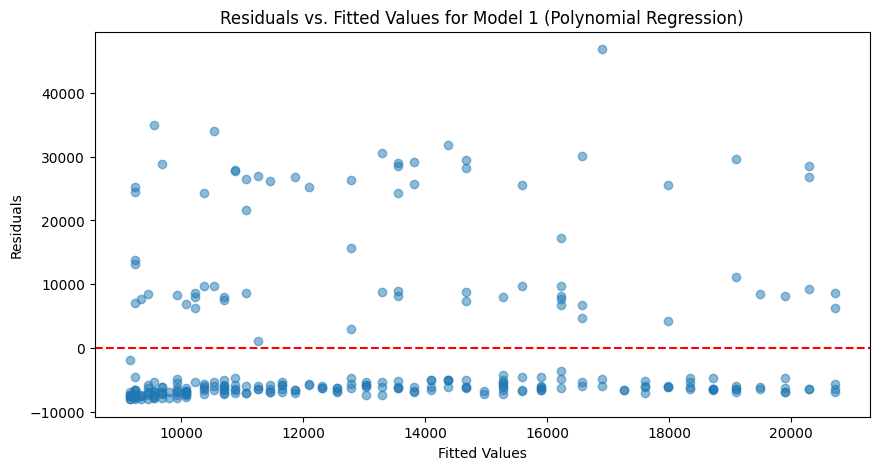

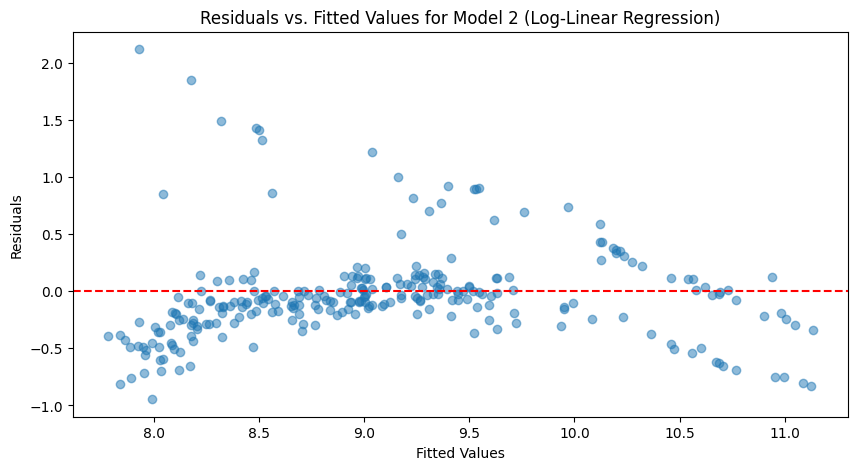

In [50]:
residuals_poly = y_test - y_pred1_poly

residuals_log = y_log_test - y_pred2_log

plt.figure(figsize=(10, 5))
plt.scatter(y_pred1_poly, residuals_poly, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values for Model 1 (Polynomial Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_pred2_log, residuals_log, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values for Model 2 (Log-Linear Regression)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()



- **Residuals Distribution**: The residuals appear to be somewhat evenly distributed around the horizontal axis (the red dashed line at 0), which is a good sign. This suggests that there is no obvious pattern in the residuals, and the model does not exhibit clear signs of non-linearity.

- **Variance of Residuals**: There doesn't seem to be a pattern of increasing or decreasing variance of residuals as the fitted values increase. This is indicative of homoscedasticity, meaning the variance of the error terms is constant across different levels of predicted values, which is an important assumption in linear regression.

- **Outliers**: There are some residuals that stand out for being particularly high or low. These could be potential outliers. They are not excessively numerous or extreme, but they might still warrant further investigation to ensure they are not unduly influencing the model.

- **Centering Around Zero**: Most residuals are close to zero, suggesting the model's predictions are generally close to the true log values. However, there are some residuals further from zero, which could suggest occasional larger errors in prediction.

- **Overall Model Fit**: Given the R-squared value from your previous output was quite high (around 0.806), and looking at the residual plot, the model seems to be performing well, especially considering the residuals do not exhibit clear problematic patterns.

In summary, the log-linear regression model appears to fit the data reasonably well, with residuals that do not show obvious violations of regression assumptions. The occasional larger residuals may indicate the presence of outliers or instances where the model doesn't perform as well, which might be areas to look into for potential model improvement.

# Logistic Regression

## Binary Classification

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

median_charges = df_encoded['charges'].median()
y_binary = (df_encoded['charges'] > median_charges).astype(int)  # 1 for above median, 0 for below or equal

X2_train, X2_test, y_binary_train, y_binary_test = train_test_split(X2, y_binary, test_size=0.2, random_state=42)

logistic_model2 = LogisticRegression(max_iter=1000)
logistic_model2.fit(X2_train, y_binary_train)

y_binary_pred2 = logistic_model2.predict(X2_test)

conf_matrix = confusion_matrix(y_binary_test, y_binary_pred2)
class_report = classification_report(y_binary_test, y_binary_pred2)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Confusion Matrix:
[[132  14]
 [  8 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       146
           1       0.89      0.93      0.91       122

    accuracy                           0.92       268
   macro avg       0.92      0.92      0.92       268
weighted avg       0.92      0.92      0.92       268



### Classification Report:
The precision for predicting below median charge (class 0) is 0.94, meaning 94% of the instances predicted as class 0 are indeed class 0.
The recall for class 0 is 0.90, meaning the model correctly identifies 90% of all actual class 0 instances.

The F1-score for class 0 is 0.92, which is a harmonic mean of precision and recall and suggests a good balance between the two for class 0.
Class 1 (above median charge) has a slightly lower precision of 0.89 but a higher recall of 0.93, indicating that while the model is slightly more likely to incorrectly predict above median charges, it is also more likely to capture most of the true above median charges.
The F1-score for class 1 is 0.91, which is also indicative of a good balance between precision and recall.

The accuracy of the model is 0.92, which means it correctly predicts the charge category 92% of the time over the test dataset.
The macro and weighted averages for precision, recall, and F1-score are all 0.92, indicating consistent performance across both classes.

In [33]:
coefficients = logistic_model2.coef_[0]
feature_names = X2.columns
coefficients_with_features = pd.DataFrame(list(zip(feature_names, coefficients)), columns=['Feature', 'Coefficient'])

print(coefficients_with_features)

             Feature  Coefficient
0                age     0.147272
1                bmi     0.032604
2           sex_male    -0.245971
3         children_1    -0.463554
4         children_2    -0.163322
5         children_3    -0.073179
6         children_4     0.983696
7         children_5     0.108333
8         smoker_yes     6.085578
9   region_northwest    -0.327393
10  region_southeast    -0.546047
11  region_southwest    -0.661099


### Coefficients Interpretation:
The feature 'age' has a positive coefficient (0.147272), suggesting that as age increases, so does the likelihood of having insurance charges above the median.
The feature 'bmi' also has a positive coefficient (0.032604), indicating a similar trend where higher BMI is associated with higher charges.

'sex_male' has a negative coefficient (-0.245971), which implies that being male is associated with a lower likelihood of charges being above the median compared to being female (the reference category).

The 'children' coefficients suggest that having one child is most strongly associated with lower charges, while having four children is associated with a higher likelihood of charges being above the median. The other coefficients for 'children' have smaller magnitudes, indicating a less strong association with the charge categories.

'smoker_yes' has a very high positive coefficient (6.085578), indicating that being a smoker is strongly associated with a higher likelihood of having above-median charges.

The region features all have negative coefficients compared to the base region 'northeast,' indicating that living in the northwest, southeast, or southwest is associated with a lower likelihood of charges being above the median.


Overall, the model performs well, and the coefficients provide insights into the factors that are associated with higher or lower insurance charges. The large coefficient for smoking status indicates it is a particularly strong predictor in this context.

## Multinominal Classification

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


bins = [0, 10000, 20000, 30000, 40000, np.inf]
labels = [0, 1, 2, 3, 4]
y_categorical = pd.cut(df_encoded['charges'], bins=bins, labels=labels)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_categorical)

X_train, X_test, y_train, y_test = train_test_split(X2, y_encoded, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)


class_report = classification_report(y_test, y_pred, labels=range(len(labels)))

print(class_report)



              precision    recall  f1-score   support

           0       0.94      0.91      0.92       155
           1       0.62      0.86      0.72        56
           2       0.67      0.25      0.36        24
           3       0.75      0.53      0.62        17
           4       0.79      0.94      0.86        16

    accuracy                           0.82       268
   macro avg       0.75      0.70      0.70       268
weighted avg       0.83      0.82      0.81       268



### Classification Report:

- **Class 0**: High precision (0.94) and recall (0.91), indicating the model is very effective at predicting this class.
- **Class 1**: Moderate precision (0.62) but high recall (0.86), suggesting that while the model is less precise, when it predicts class 1, it's usually correct.
- **Class 2**: Lower precision (0.67) and recall (0.25), indicating the model struggles with this class, often missing actual class 2 instances.
- **Class 3**: Fair precision (0.75) but lower recall (0.53), suggesting the model is reasonably precise but fails to identify more than half of the actual class 3 instances.
- **Class 4**: Good precision (0.79) and very high recall (0.94), showing the model performs well at identifying this class.

The **accuracy** of 0.82 across all predictions suggests the model is correct 82% of the time across all classes. The **macro average** precision and recall are both 0.75, indicating moderate overall performance across all classes without considering the class imbalance. The **weighted average** takes the support (the number of true instances for each class) into account, resulting in slightly higher precision and recall averages due to better performance on the more prevalent classes.

In summary, the model is most effective at predicting charges in the lowest (0) and highest (4) classes. It has difficulty with the intermediate classes, especially class 2, where both precision and recall are low, which could be due to fewer training instances in these classes or overlap in the charge amounts that make them harder to distinguish. The intercept values represent the log-odds of being in each class when all features are at their mean values, with large positive intercepts for lower classes and large negative ones for higher classes, compared to the reference.

In [40]:

feature_names = X2.columns
coefficients = logistic_model.coef_
intercepts = logistic_model.intercept_

coefficients_df = pd.DataFrame(coefficients, columns=feature_names)
coefficients_df['intercept'] = intercepts
coefficients_df['class'] = labels

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

print(coefficients_df)

        age       bmi  sex_male  children_1  children_2  children_3  \
0 -0.115858 -0.111948  0.135659    0.418448   -0.255899    0.019584   
1  0.019049 -0.112378 -0.203021   -0.415913   -0.360088   -0.153136   
2  0.028960 -0.139039 -0.137512    0.128272   -0.037725   -0.145163   
3 -0.033331  0.087373  0.350585   -0.358979    0.165991    0.077962   
4  0.101180  0.275991 -0.145710    0.228173    0.487721    0.200753   

   children_4  children_5  smoker_yes  region_northwest  region_southeast  \
0   -0.999744    0.242338   -6.245793          0.125396          0.376898   
1    0.186197    0.278943   -1.370756         -0.085636         -0.064616   
2    0.234511   -0.391563    0.235137          0.091278         -0.046762   
3   -0.003274   -0.110268    1.893344         -0.185524         -0.091454   
4    0.582309   -0.019450    5.488068          0.054486         -0.174066   

   region_southwest  intercept  class  
0          0.546158  11.229355      0  
1         -0.009206   5.301459

### Multinomial Logistic Regression Coefficients:

Each row of coefficients corresponds to a class (0-4) in comparison to the last class (presumably class 5, which is the reference category and not shown here). The coefficients indicate the log-odds impact of each feature for the respective class against the reference class.

- For **class 0** (charges between 0-10,000):
  - Age and BMI have negative coefficients, suggesting that as these increase, it's less likely for charges to fall into this lowest class when compared to the reference class (charges above 50,000).
  - 'sex_male', 'children_1', and 'region_southwest' have positive coefficients, indicating a higher likelihood of falling into this class.
  - 'smoker_yes' has a large negative coefficient, suggesting smoking greatly reduces the likelihood of being in the lowest charge category.

- For **classes 1-4**:
  - The coefficients vary by feature and class, but a few patterns can be discerned. For instance, 'smoker_yes' consistently has a negative influence on being in lower charge categories, though the magnitude varies.
  - The 'children' features show varying influence across classes. For instance, having four children greatly increases the likelihood of charges falling into class 0 but less so for other classes.

**Discussion:**
This research utilizes a substantial dataset to explore the intricacies of health insurance charges. The study extends beyond simple linear relationships, adopting polynomial and log-linear transformations to better capture the complexity of real-world data. With these transformations, the models aim to address issues like non-linearity and variance instability highlighted by the exploratory data analysis. Scatter plots suggest a positive relationship between age and charges, with a less distinct but still positive relationship for BMI. The rest of the features, being categorical, are duly transformed to fit into our regression models. The study recognizes age and BMI as numerical predictors, employing one-hot encoding for the categorical variables, and designating base categories for comparison.

**Linear Model Comparison and Assumptions:**
- **Model 1** solely uses age as a predictor, explaining a meager 12.4% of the variance in charges, suggesting its insufficiency as a standalone predictor. The residual plots for Model 1 show patterns of non-linearity and heteroscedasticity, which indicates potential model violations and the presence of outliers.

- **Model 2**, a more comprehensive model incorporating all predictors, displays a stronger R^2 value of approximately 0.783, signaling a substantial improvement in the variance explanation. It points to smoking status as the most influential factor. Although Model 2 also shows some signs of non-linearity and heteroscedasticity, its performance is markedly better than Model 1, based on residual distribution and the assumption of constant variance.

**Model Comparison and Assumptions:**
- **Model 1 (Polynomial Regression)**: Addressing the non-linear trend observed with 'age', a polynomial regression is employed. Although the R^2 score improves slightly compared to the simple linear model, indicating a better fit, the underlying assumptions of linear regression still seem to be challenged, as suggested by the residual patterns.

- **Model 2 (Log-Linear Regression)**: Transforming the 'charges' using a logarithmic scale leads to a significant improvement in the R^2 score, hinting at a robust model that accounts for approximately 80.6% of the variance in charges. The residuals from this model present a more randomized distribution, suggesting that the log transformation aids in fulfilling the homoscedasticity assumption.

**Classification Models:**
The study also incorporates classification approaches to delineate the insurance costs into distinct categories. By employing logistic regression models, we categorize the costs, enabling the prediction of cost categories rather than exact amounts. This approach is pivotal when precise predictions are less critical than classifying the relative magnitude of costs.

- **Binary Classification Model**: This model divides the charges into two groups based on the median charge value. It yields high accuracy, showing the model’s capacity to differentiate between lower and higher-than-median charges effectively.
  
- **Multinomial Classification Model**: Extending the binary approach, this model classifies charges into multiple categories, enhancing the granularity of the predictions. The varying precision and recall across categories suggest that while the model performs well for certain charge ranges, it might struggle with others, pointing to areas where model refinement is needed.

**Limitations and Further Research:**
The study acknowledges its constraints, primarily the limitations inherent in using a linear model to map non-linear relationships. The existence of outliers and the model's assumptions are challenged, especially in the simple linear regression model. Additionally, the models may not capture all existing interactions or non-linear relationships.

Future research could explore non-linear models or advanced regression techniques to better accommodate the complex relationships between predictors and insurance charges. Furthermore, gathering more contextual data could enhance the model's explanatory power, such as personal health records or more granular regional data.